In [1]:
%load_ext watermark
%watermark

2020-09-04T10:41:14-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-45-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
df = pd.read_csv("boston_dataset.csv")

df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


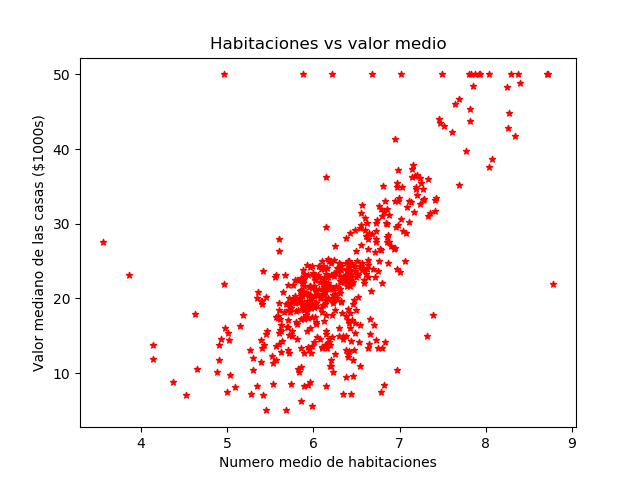

Text(0, 0.5, 'Valor mediano de las casas ($1000s)')

In [4]:
import matplotlib.pyplot as plt
df.plot.scatter(x="N_HABITACIONES_MEDIO",y="VALOR_MEDIANO",marker="*",color="red")
plt.title("Habitaciones vs valor medio")
plt.xlabel("Numero medio de habitaciones")
plt.ylabel("Valor mediano de las casas ($1000s)")

Podemos modificar los parametros de matplotlib de forma global

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,6)

## Estilos
Matplotlib tiene diferentes estilos para generar los gráficos, podemos verlos con el siguiente comando

In [6]:
plt.style.available

['_classic_test',
 'seaborn-notebook',
 'seaborn-pastel',
 'seaborn-bright',
 'bmh',
 'seaborn-paper',
 'ggplot',
 'seaborn-deep',
 'seaborn-ticks',
 'classic',
 'tableau-colorblind10',
 'seaborn-white',
 'fast',
 'dark_background',
 'grayscale',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'Solarize_Light2',
 'seaborn-dark',
 'seaborn-talk',
 'seaborn',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-dark-palette']

<IPython.core.display.Javascript object>


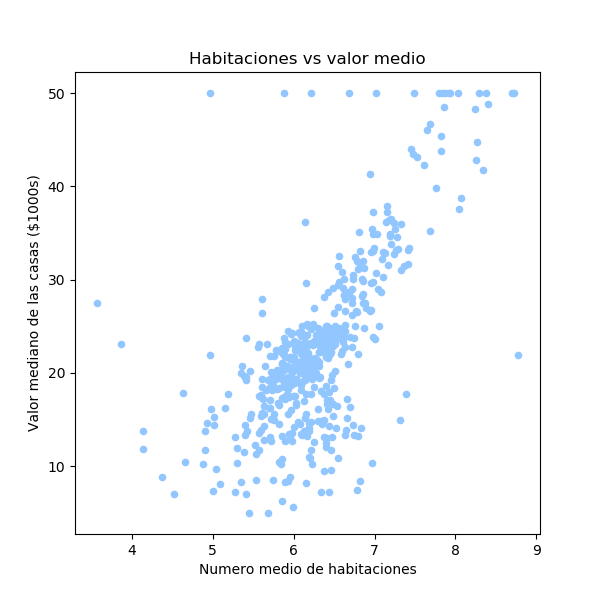

Text(0, 0.5, 'Valor mediano de las casas ($1000s)')

In [7]:
plt.style.use("seaborn-pastel")
df.plot.scatter(x="N_HABITACIONES_MEDIO",y="VALOR_MEDIANO")
plt.title("Habitaciones vs valor medio")
plt.xlabel("Numero medio de habitaciones")
plt.ylabel("Valor mediano de las casas ($1000s)")

In [8]:
#plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>


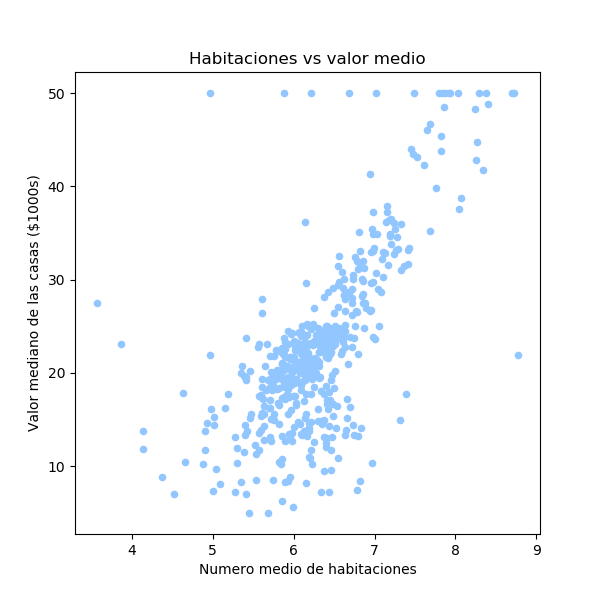

Text(0, 0.5, 'Valor mediano de las casas ($1000s)')

In [8]:
df.plot.scatter(x="N_HABITACIONES_MEDIO",y="VALOR_MEDIANO")
plt.title("Habitaciones vs valor medio")
plt.xlabel("Numero medio de habitaciones")
plt.ylabel("Valor mediano de las casas ($1000s)")

## Función interact
Es una funcion que nos permite comparar variables de un dataset en tiempo real

In [9]:
from ipywidgets import interact

In [10]:
@interact(col1 = df.columns.tolist())
def graficar(col1):
    df.plot.scatter(x=col1,y="VALOR_MEDIANO",color="red",alpha=0.3)
    plt.title("{} vs VALOR_MEDIANO".format(col1))

interactive(children=(Dropdown(description='col1', options=('CIUDAD', 'LON', 'LAT', 'VALOR_MEDIANO', 'INDICE_C…

In [11]:
%matplotlib notebook

## Manejo de mapas
Podemos hacer estudios poblacionales en python teniendo datos de lat y longitud para un dataset

<IPython.core.display.Javascript object>


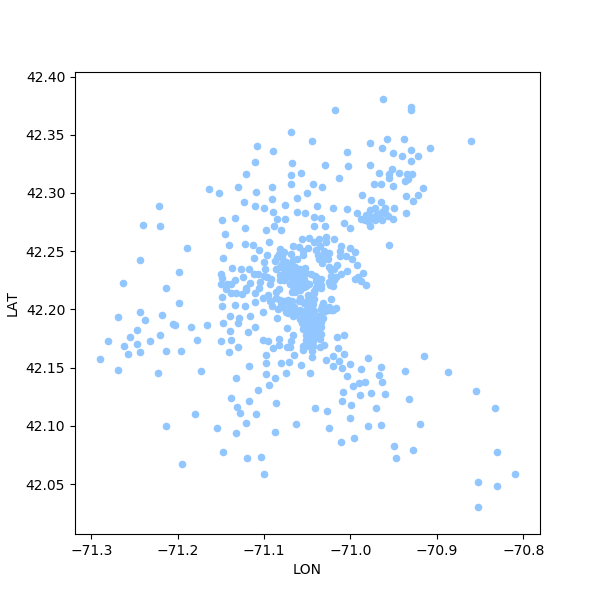

In [12]:
df.plot.scatter(x="LON" , y="LAT")

Para esto podemos usar <font size=4>CARTOPY</font> Que es una libreria de cartografia en python 

In [13]:
import cartopy.crs as ccrs
from cartopy.io import img_tiles

<IPython.core.display.Javascript object>


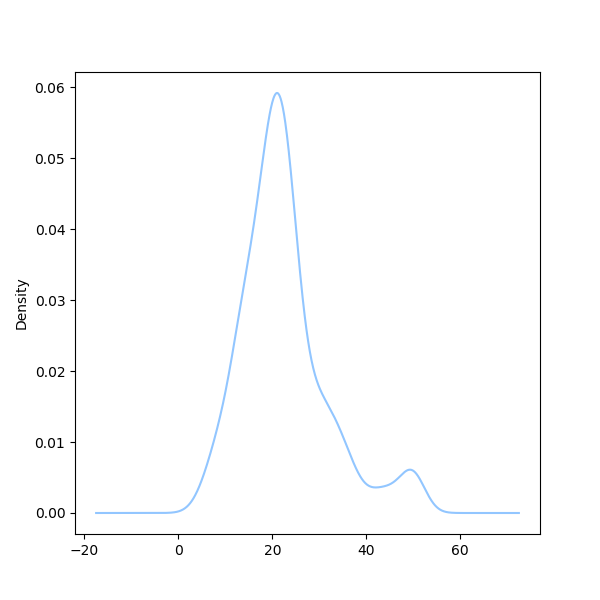

In [14]:
df.VALOR_MEDIANO.plot.kde()

In [15]:
primer_quintil = df.VALOR_MEDIANO.quantile(0.2)
tercer_quintil = df.VALOR_MEDIANO.quantile(0.8)

Vamos a bajar las imagenes de google maps. Para saber la latitud y longitud podemos usar la herramienta bounding box https://boundingbox.klokantech.com/

<IPython.core.display.Javascript object>


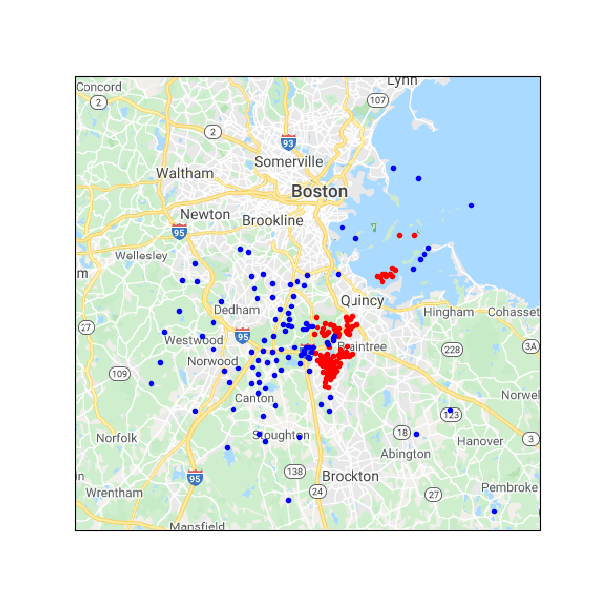

In [19]:
imagery = img_tiles.GoogleTiles()

ax = plt.axes(projection=imagery.crs)

ax.set_extent([-71.38,-70.77,42.03,42.47])

ax.add_image(imagery,10)

df_primer_qt = df[df.VALOR_MEDIANO < primer_quintil]
df_tercer_qt = df[df.VALOR_MEDIANO > tercer_quintil]

plt.plot(df_primer_qt.LON, df_primer_qt.LAT, transform=ccrs.Geodetic(),marker=".",color="red",linewidth=0)
plt.plot(df_tercer_qt.LON, df_tercer_qt.LAT, transform=ccrs.Geodetic(),marker=".",color="blue",linewidth=0)
plt.show()

## Seaborn

In [20]:
import seaborn as sns

La primera ventaja que tiene seaborn es que permite aproximar una serie de puntos con un modelo de regresión, vamos a hacerlo con un modelo lineal

<IPython.core.display.Javascript object>


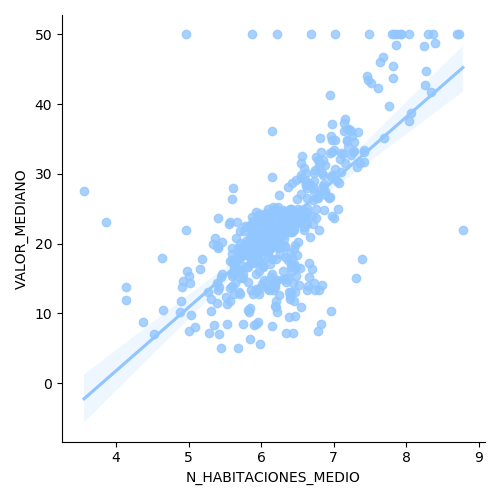

In [21]:
sns.lmplot(x="N_HABITACIONES_MEDIO",y="VALOR_MEDIANO",data=df)

También se pueden realizar mapas de calor con seaborn

<IPython.core.display.Javascript object>


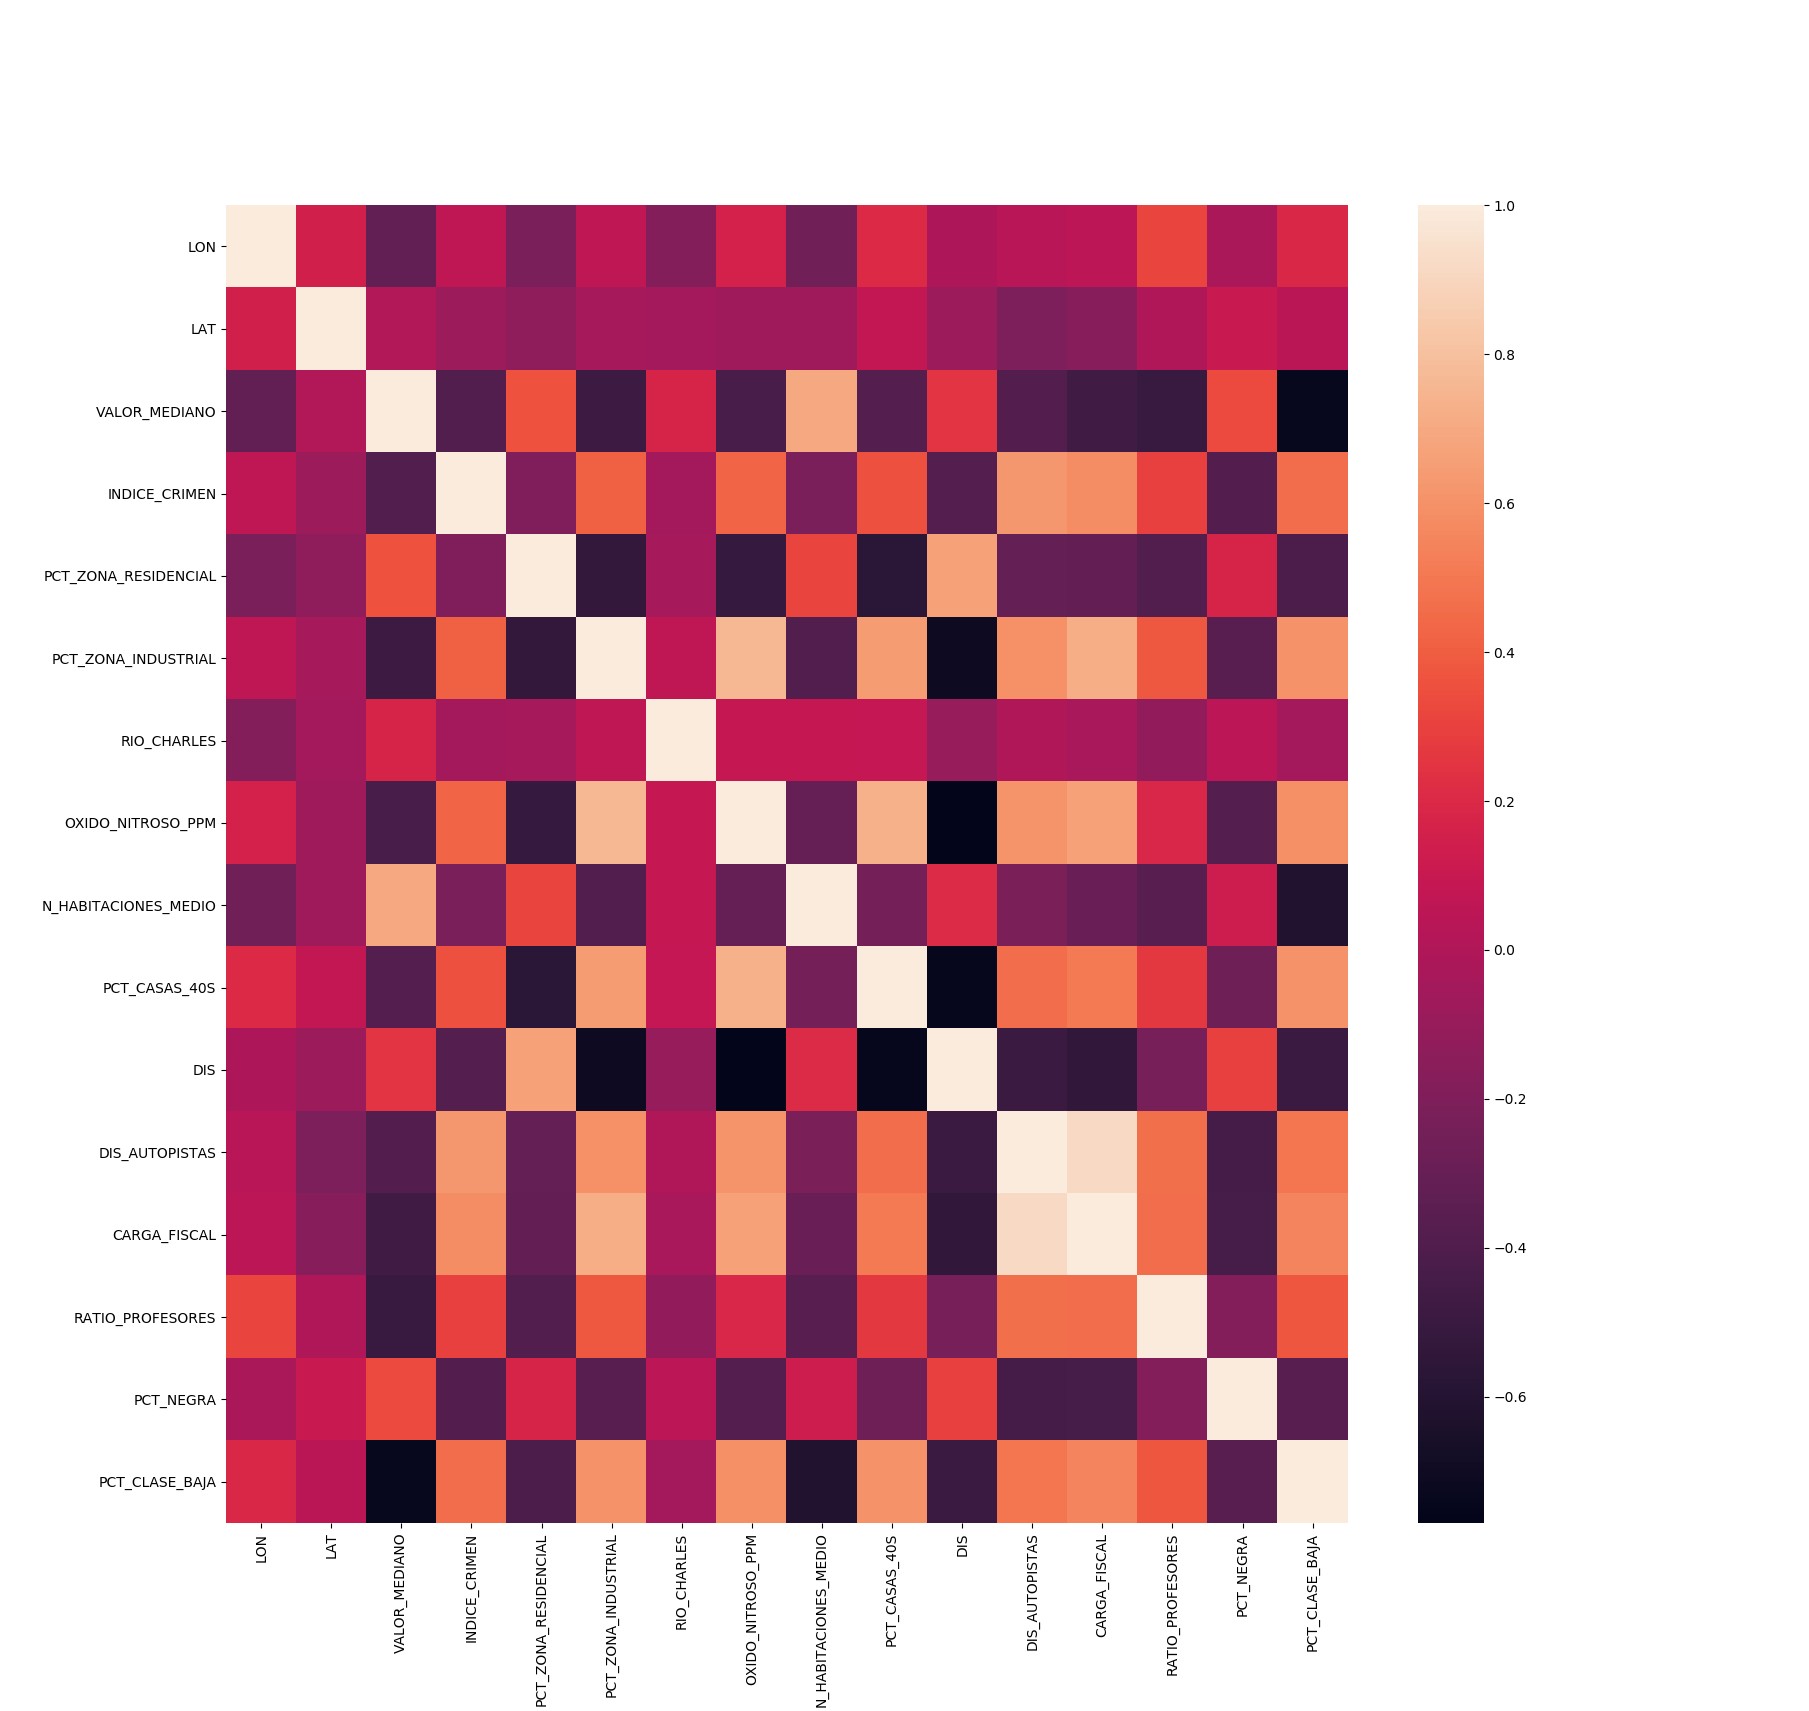

In [23]:
sns.heatmap(df.corr())

## Bokeh

Bokeh es otra libreria para graficación desarrollada por los mismos desarolladores de anaconda. Tiene librerias en javascript para renderizado en web y tiene un servidor que se encarga de hacer calculos para generar los gráficos

In [25]:
import bokeh.plotting as bk

bk.output_notebook()

Loading BokehJS ...

In [26]:
df["CRIMEN_QUINTIL"] = pd.qcut(df.INDICE_CRIMEN, 5)

In [27]:
df.CRIMEN_QUINTIL.cat.categories

IntervalIndex([(0.00532, 0.0642], (0.0642, 0.15], (0.15, 0.55], (0.55, 5.581], (5.581, 88.976]],
              closed='right',
              dtype='interval[float64]')

In [31]:
# importamos las paletas de colores para asignar a nuestro gráfico 
from bokeh.palettes import brewer
colors = brewer["Spectral"][len(df.CRIMEN_QUINTIL.unique())]
colors

('#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c')

https://colorbrewer2.org/#type=sequential&scheme=Oranges&n=3

In [35]:
# Primero debemos crear una figura
p = bk.figure(
    plot_width=600,
    plot_height=600,
    title="Habitaciones vs Valor Vivienda",
)
for i,quintil in enumerate(df.CRIMEN_QUINTIL.cat.categories):
    df_q = df[df.CRIMEN_QUINTIL==quintil]
    p.scatter(df_q.N_HABITACIONES_MEDIO, df_q.VALOR_MEDIANO,color=colors[i],
             legend_label="({}-{})".format(quintil.left, quintil.right))

bk.show(p)

En Bokeh también podemos hacer histograma, sin embargo no es tan sencillo como pandas y matplotlib

<IPython.core.display.Javascript object>


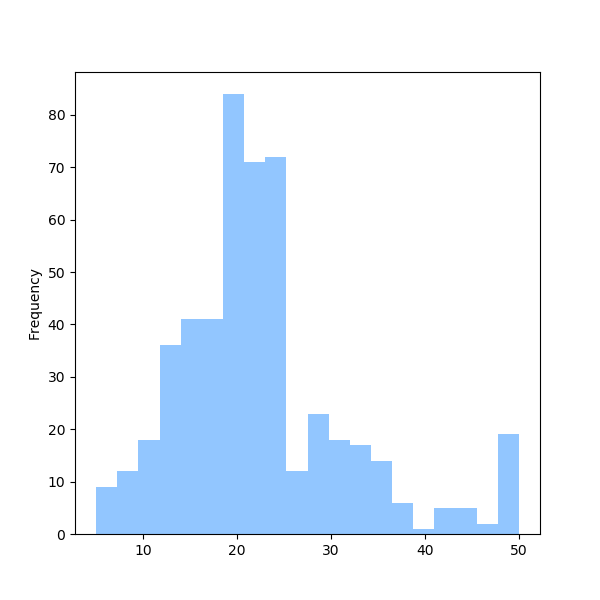

In [55]:
df.VALOR_MEDIANO.plot.hist(bins=20)
plt.show()

Para hacerlo con bokeh debemos utilizar numpy para obtener los valores de dicho histograma

In [51]:
import numpy as np
hist,edges = np.histogram(df.VALOR_MEDIANO,bins=20)

Esta función de numpy genera dos valores, hist son los valores de cada categoria en el histograma (alturas de los rectangulos), edges son los rangos de los intervalos

In [52]:
hist

array([ 9, 12, 18, 36, 41, 41, 84, 71, 72, 12, 23, 18, 17, 14,  6,  1,  5,
        5,  2, 19])

In [53]:
edges

array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
       25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
       45.5 , 47.75, 50.  ])

In [54]:
p1 = bk.figure(
    title = "Histograma Valor viviendas",
    tools = "save,hover",
    background_fill_color="#E8DDCB"
)
p1.quad(top=hist,bottom=0,left=edges[:-1],right=edges[1:],fill_color="red")
bk.show(p1)

In [49]:
%matplotlib notebook

## Altair
Si Bokeh requeria de un gran nivel de detalle para realizar los gráficos ALTAIR es lo contrario.

In [90]:
from altair import Chart,Color,Scale
import altair

In [88]:
colores = Scale(range=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'])
chart = Chart(df).mark_point().encode(
    x="N_HABITACIONES_MEDIO",
    y="VALOR_MEDIANO",
    color = Color("CRIMEN_QUINTIL",colores)
)

## revisar esta celda porque falla